In [1]:
import pandas as pd

## Leyendo Datasets y Procesando Datasets

In [2]:
# Cargar el archivo Excel
archivo_excel = "Prueba proceso de selección Analista de Datos - bases.xlsx"

# Leer una hoja específica
df_cliente = pd.read_excel(archivo_excel, sheet_name="Detalle_cliente")

# Mostrar el DataFrame
df_cliente

df_tx = pd.read_excel(archivo_excel, sheet_name="Detalle_tx")
df_tx

,Id_tx,clase,valor
0,6869,COMPRA,3495240
1,4355,COMPRA,475800
2,5416,COMPRA,115775
3,3249,COMPRA,1579898
4,2774,COMPRA,84077
...,...,...,...
2495,3884,COMPRA,68500
2496,8254,COMPRA,218350
2497,9456,COMPRA,247089
2498,6523,COMPRA,51000


In [3]:
df_cliente.dtypes

,0
Id_cliente,int64
fecha_efectiva,float64
Id_tx,int64


In [4]:
df_tx.dtypes

,0
Id_tx,int64
clase,object
valor,object


## Ahora limipiamos los datos

In [5]:
df_cliente.isnull().sum()

,0
Id_cliente,0
fecha_efectiva,12
Id_tx,0


In [6]:
# Eliminar filas que tengan valores nulos en cualquier columna
df_cliente = df_cliente.dropna()
df_tx = df_tx.dropna()

# Mostrar los DataFrames resultantes
df_cliente.isnull().sum()

,0
Id_cliente,0
fecha_efectiva,0
Id_tx,0


In [7]:
df_cliente.isnull().sum()

,0
Id_cliente,0
fecha_efectiva,0
Id_tx,0


In [8]:
df_tx.isnull().sum()

,0
Id_tx,0
clase,0
valor,0


## Convertimos a los formatos adecuados

In [9]:
df_cliente["fecha_efectiva"]

,fecha_efectiva
0,20210303.0
1,20201129.0
2,20200929.0
3,20210222.0
4,20200930.0
...,...
2495,20210221.0
2496,20201115.0
2497,20201102.0
2498,20201018.0


### Vemos cuantas fechas no tienen el formato YYYYMMDD para luego filtrar las que tienen formato correcto (si no son muchas)

In [10]:
import pandas as pd

# Definir el patrón para el formato esperado (YYYYMMDD.0)
pattern = r'^\d{8}\.0$'

# Contar filas que NO coincidan con el patrón
filas_no_validas = df_cliente[~df_cliente['fecha_efectiva'].astype(str).str.fullmatch(pattern)]

# Mostrar la cantidad de filas no válidas
print(f"Cantidad de filas no válidas: {len(filas_no_validas)}")

# Opcional: Mostrar las filas que no coinciden
print(filas_no_validas)


Cantidad de filas no válidas: 4
      Id_cliente  fecha_efectiva  Id_tx
1287         118        202012.0   9186
1624         123        202001.0   4160
1869         131          2021.0   5464
2148         112          2020.0   4500


In [11]:
# Filtrar filas que cumplen con el formato y actualizar el DataFrame
df_cliente = df_cliente[df_cliente['fecha_efectiva'].astype(str).str.fullmatch(pattern)]

# Mostrar el DataFrame actualizado
print(df_cliente)

      Id_cliente  fecha_efectiva  Id_tx
0            136      20210303.0   6869
1            116      20201129.0   4355
2            119      20200929.0   5416
3            121      20210222.0   3249
4            152      20200930.0   2774
...          ...             ...    ...
2495         119      20210221.0   3884
2496         152      20201115.0   8254
2497         125      20201102.0   9456
2498         126      20201018.0   6523
2499         129      20210216.0   5113

[2484 rows x 3 columns]


In [12]:
# Contar filas que NO coincidan con el patrón
filas_no_validas = df_cliente[~df_cliente['fecha_efectiva'].astype(str).str.fullmatch(pattern)]

# Mostrar la cantidad de filas no válidas
print(f"Cantidad de filas no válidas: {len(filas_no_validas)}")

# Mostrar las filas que no coinciden
print(filas_no_validas)

Cantidad de filas no válidas: 0
Empty DataFrame
Columns: [Id_cliente, fecha_efectiva, Id_tx]
Index: []


In [13]:
# Convertir la columna float64 a int para eliminar el decimal y luego a formato de fecha
df_cliente['fecha_efectiva'] = pd.to_datetime(df_cliente['fecha_efectiva'].astype(int), format='%Y%m%d')

df_cliente

,Id_cliente,fecha_efectiva,Id_tx
0,136,2021-03-03,6869
1,116,2020-11-29,4355
2,119,2020-09-29,5416
3,121,2021-02-22,3249
4,152,2020-09-30,2774
...,...,...,...
2495,119,2021-02-21,3884
2496,152,2020-11-15,8254
2497,125,2020-11-02,9456
2498,126,2020-10-18,6523


In [14]:
df_cliente.dtypes

,0
Id_cliente,int64
fecha_efectiva,datetime64[ns]
Id_tx,int64


### Ahora convertimos a float la columna  valor del dataset de transacciones

In [15]:
df_tx.dtypes

,0
Id_tx,int64
clase,object
valor,object


In [16]:
# Convertir la columna 'valor' a tipo float
df_tx['valor'] = pd.to_numeric(df_tx['valor'], errors='coerce').astype(float)

# Mostrar el DataFrame actualizado
df_tx

<ipython-input-16-6b65f73ddd10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tx['valor'] = pd.to_numeric(df_tx['valor'], errors='coerce').astype(float)


,Id_tx,clase,valor
0,6869,COMPRA,3495240.0
1,4355,COMPRA,475800.0
2,5416,COMPRA,115775.0
3,3249,COMPRA,1579898.0
4,2774,COMPRA,84077.0
...,...,...,...
2495,3884,COMPRA,68500.0
2496,8254,COMPRA,218350.0
2497,9456,COMPRA,247089.0
2498,6523,COMPRA,51000.0


In [17]:
df_tx.dtypes

,0
Id_tx,int64
clase,object
valor,float64


### Combinamos los dataframes

In [18]:
# Combinar los DataFrames por la columna 'id_tx'
df_consolidado = pd.merge(df_cliente, df_tx, on='Id_tx', how='inner')

# Mostrar el DataFrame combinado
df_consolidado

,Id_cliente,fecha_efectiva,Id_tx,clase,valor
0,136,2021-03-03,6869,COMPRA,3495240.00
1,116,2020-11-29,4355,COMPRA,475800.00
2,116,2020-11-29,4355,COMPRA,350503.62
3,119,2020-09-29,5416,COMPRA,115775.00
4,121,2021-02-22,3249,COMPRA,1579898.00
...,...,...,...,...,...
3273,152,2020-11-15,8254,COMPRA,218350.00
3274,125,2020-11-02,9456,COMPRA,247089.00
3275,126,2020-10-18,6523,COMPRA,51000.00
3276,129,2021-02-16,5113,COMPRA,288900.00


In [19]:
print(df_consolidado)

      Id_cliente fecha_efectiva  Id_tx   clase       valor
0            136     2021-03-03   6869  COMPRA  3495240.00
1            116     2020-11-29   4355  COMPRA   475800.00
2            116     2020-11-29   4355  COMPRA   350503.62
3            119     2020-09-29   5416  COMPRA   115775.00
4            121     2021-02-22   3249  COMPRA  1579898.00
...          ...            ...    ...     ...         ...
3273         152     2020-11-15   8254  COMPRA   218350.00
3274         125     2020-11-02   9456  COMPRA   247089.00
3275         126     2020-10-18   6523  COMPRA    51000.00
3276         129     2021-02-16   5113  COMPRA   288900.00
3277         129     2021-02-16   5113  COMPRA   156000.00

[3278 rows x 5 columns]


## Analisis Descriptivo

In [20]:
df_consolidado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3278 entries, 0 to 3277
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id_cliente      3278 non-null   int64         
 1   fecha_efectiva  3278 non-null   datetime64[ns]
 2   Id_tx           3278 non-null   int64         
 3   clase           3278 non-null   object        
 4   valor           3276 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 128.2+ KB


In [21]:
df_consolidado = df_consolidado.dropna()

In [22]:
df_consolidado.isnull().sum()

,0
Id_cliente,0
fecha_efectiva,0
Id_tx,0
clase,0
valor,0


In [ ]:
# Guardarlo en CSV
df_consolidado.to_csv('archivo_consolidado.csv', index=False)
df_consolidado

,Id_cliente,fecha_efectiva,Id_tx,clase,valor
0,136,2021-03-03,6869,COMPRA,3495240.00
1,116,2020-11-29,4355,COMPRA,475800.00
2,116,2020-11-29,4355,COMPRA,350503.62
3,124,2021-01-20,4355,COMPRA,475800.00
4,124,2021-01-20,4355,COMPRA,350503.62
...,...,...,...,...,...
3273,118,2021-02-26,6685,COMPRA,85475.00
3274,119,2021-02-21,3884,COMPRA,68500.00
3275,152,2020-11-15,8254,COMPRA,218350.00
3276,125,2020-11-02,9456,COMPRA,247089.00


In [24]:
import pandas as pd
df_consolidado = pd.read_excel("archivo_consolidado.xlsx")

### Que tipo de Transacciones Predominan?

In [25]:
df_consolidado['clase'].value_counts()

,count
clase,
COMPRA,2542
AVANCE,719
SEGURO,11


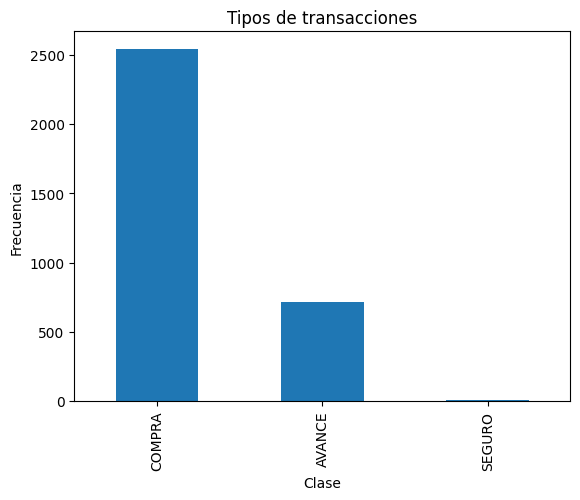

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

df_consolidado['clase'].value_counts().plot(kind='bar')
plt.title("Tipos de transacciones")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

### ¿Cuántas transacciones hace cada cliente en promedio?

In [ ]:
# Crear el DataFrame de estadísticas
transacciones_por_cliente = df_consolidado['Id_cliente'].value_counts()
stats_df = transacciones_por_cliente.describe().to_frame(name='Estadísticas Transaccionales de los clientes')

# Función para formatear los números
def format_number(row):
    if row.name == 'std':  # No redondear la desviación estándar
        return round(row['Estadísticas Transaccionales de los clientes'], 2)
    return round(row['Estadísticas Transaccionales de los clientes'])  # Redondear todos los demás valores

# Aplicar el formato al DataFrame
stats_df['Estadísticas Transaccionales de los clientes'] = stats_df.apply(format_number, axis=1)

stats_df

,Estadísticas Transaccionales de los clientes
count,70.00
mean,47.00
std,42.21
min,1.00
25%,8.00
50%,30.00
75%,80.00
max,137.00


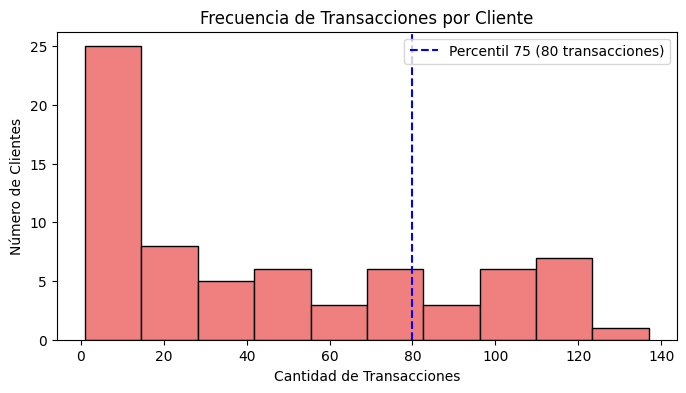

In [ ]:
import matplotlib.pyplot as plt

# Histograma
plt.figure(figsize=(8, 4))
plt.hist(transacciones_por_cliente, bins=10, color="lightcoral", edgecolor="black")
plt.axvline(x=80, color='blue', linestyle='--', label='Percentil 75 (80 transacciones)')
plt.title("Frecuencia de Transacciones por Cliente")
plt.xlabel("Cantidad de Transacciones")
plt.ylabel("Número de Clientes")
plt.legend()
plt.show()

### ¿Qué podemos decir analizando el valor de las transacciones?

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
df_consolidado['valor'].describe()

,valor
count,"3,276.00"
mean,"375,758.64"
std,"574,859.89"
min,20.00
25%,"64,087.75"
50%,"167,455.00"
75%,"483,975.00"
max,"7,952,039.23"


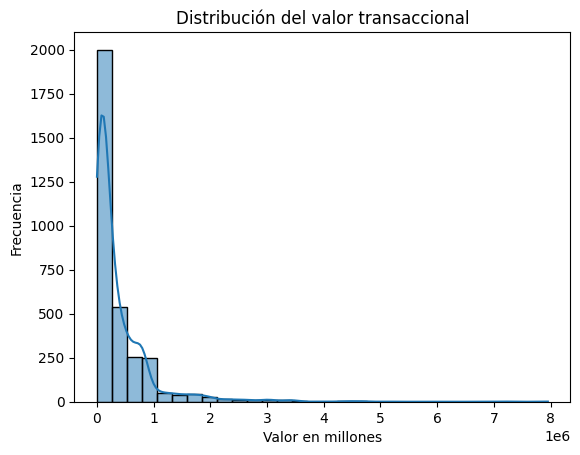

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Crear el histograma
sns.histplot(df_consolidado['valor'], bins=30, kde=True)
plt.title("Distribución del valor transaccional")
plt.xlabel("Valor en millones")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

### Patrones Temporales

#### Frecuencia de transacciones por mes/año

In [ ]:
df_consolidado_detalle = df_consolidado.copy()
df_consolidado_detalle

,Id_cliente,fecha_efectiva,Id_tx,clase,valor
0,136,2021-03-03,6869,COMPRA,3495240.00
1,116,2020-11-29,4355,COMPRA,475800.00
2,116,2020-11-29,4355,COMPRA,350503.62
3,124,2021-01-20,4355,COMPRA,475800.00
4,124,2021-01-20,4355,COMPRA,350503.62
...,...,...,...,...,...
3271,118,2021-02-26,6685,COMPRA,85475.00
3272,119,2021-02-21,3884,COMPRA,68500.00
3273,152,2020-11-15,8254,COMPRA,218350.00
3274,125,2020-11-02,9456,COMPRA,247089.00


In [ ]:
df_consolidado_detalle['fecha_efectiva'] = pd.to_datetime(df_consolidado['fecha_efectiva'])
df_consolidado_detalle['Mes'] = df_consolidado['fecha_efectiva'].dt.month
df_consolidado_detalle['Año'] = df_consolidado['fecha_efectiva'].dt.year
# Realizar el groupby y resetear el índice
df_grouped = df_consolidado_detalle.groupby(['Año', 'Mes']).size().reset_index(name='Cantidad')

df_grouped

,Año,Mes,Cantidad
0,2020,9,475
1,2020,10,522
2,2020,11,597
3,2020,12,638
4,2021,1,437
5,2021,2,511
6,2021,3,96


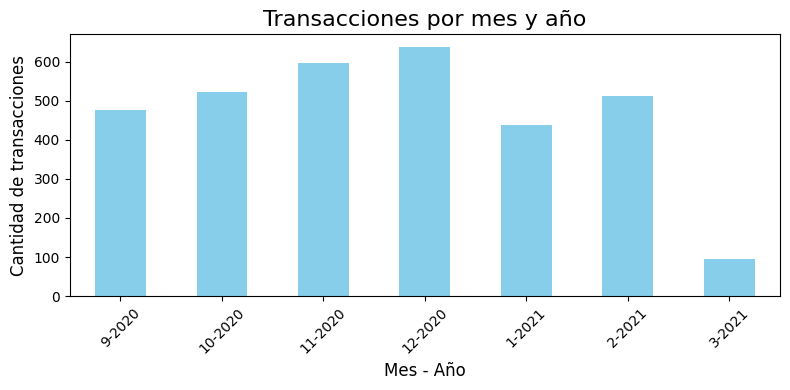

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
df_grouped.plot(kind='bar', x='Mes', y='Cantidad', legend=False, color='skyblue', ax=plt.gca())

# Personalizar el gráfico
plt.title("Transacciones por mes y año", fontsize=16)
plt.xlabel("Mes - Año", fontsize=12)
plt.ylabel("Cantidad de transacciones", fontsize=12)
plt.xticks(ticks=range(len(df_grouped)), labels=df_grouped['Mes'].astype(str) + '-' + df_grouped['Año'].astype(str), rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### Frecuencia por día de la semana

In [ ]:
df_consolidado_detalle['dia_semana'] = df_consolidado_detalle['fecha_efectiva'].dt.day_name()
# Calcular la frecuencia por día de la semana
conteo_dias = df_consolidado_detalle['dia_semana'].value_counts()

# Convertir a DataFrame y renombrar la columna
conteo_dias_df = conteo_dias.reset_index()
conteo_dias_df.columns = ['Día de la semana', 'Cantidad por día']

# Mostrar el resultado
conteo_dias_df

,Día de la semana,Cantidad por día
0,Friday,526
1,Saturday,523
2,Wednesday,522
3,Tuesday,445
4,Monday,432
5,Thursday,419
6,Sunday,409


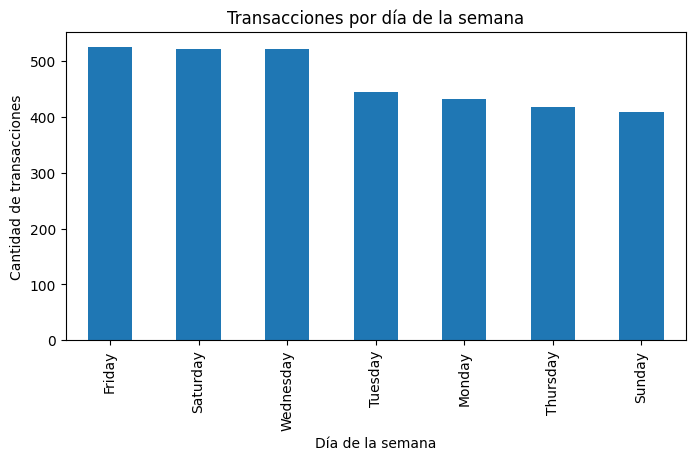

In [ ]:
plt.figure(figsize=(8, 4))
transacciones_por_dia = df_consolidado_detalle['dia_semana'].value_counts()
transacciones_por_dia.plot(kind='bar')
plt.title("Transacciones por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad de transacciones")
plt.show()

#### Clientes relevantes

In [27]:
import pandas as pd

# Obtener los top 10 clientes
top_clientes = df_consolidado['Id_cliente'].value_counts().head(10).index

# Filtrar el DataFrame para incluir solo los top clientes
df_top_clientes = df_consolidado[df_consolidado['Id_cliente'].isin(top_clientes)]

# Agrupar por cliente y clase, contando las ocurrencias
top_clientes_clases = df_top_clientes.groupby(['Id_cliente', 'clase']).size().reset_index(name='Cantidad de Transacciones')

# Ordenar la tabla por cantidad de transacciones en orden descendente
top_clientes_clases = top_clientes_clases.sort_values(by='Id_cliente', ascending=True).reset_index(drop=True)

# Mostrar la tabla
top_clientes_clases

,Id_cliente,clase,Cantidad de Transacciones
0,118,AVANCE,22
1,118,COMPRA,84
2,123,AVANCE,33
3,123,COMPRA,82
4,123,SEGURO,1
5,124,AVANCE,14
6,124,COMPRA,107
7,125,AVANCE,22
8,125,COMPRA,115
9,126,SEGURO,1


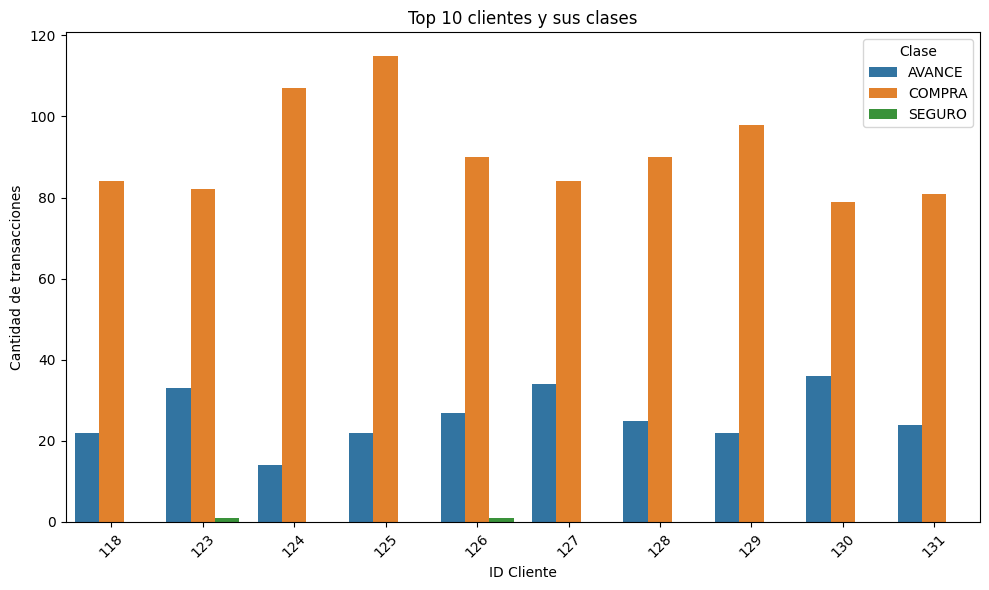

In [28]:
# Grafico de barras con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_clientes_clases, x='Id_cliente', y='Cantidad de Transacciones', hue='clase')
plt.title("Top 10 clientes y sus clases")
plt.xlabel("ID Cliente")
plt.ylabel("Cantidad de transacciones")
plt.legend(title="Clase")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Estrategias de descuentos

### Preparacion de datos

In [2]:
import pandas as pd
df_consolidado = pd.read_excel("archivo_consolidado.xlsx")

In [3]:
# La fecha actual sera la ultima fecha que aparezca en el dataset
fecha_actual = df_consolidado['fecha_efectiva'].max()
df_consolidado['dias_desde_ultima_transaccion'] = (fecha_actual - df_consolidado['fecha_efectiva']).dt.days

**DataFrame que consolida el número total de transacciones y la facturación total por cliente, separando las clases ("COMPRA" y "AVANCE").**

In [4]:
resumen_clientes = df_consolidado.groupby(['Id_cliente', 'clase']).agg(
    cantidad_transacciones=('Id_tx', 'count'),  # Usamos count() para contar el número de transacciones
    facturacion=('valor', 'sum')  # Sumamos el valor de las transacciones
).reset_index()

# Mostrar el resumen
resumen_clientes

,Id_cliente,clase,cantidad_transacciones,facturacion
0,91,AVANCE,1,500000.0
1,92,AVANCE,1,200000.0
2,94,COMPRA,4,1599018.0
3,95,AVANCE,1,100000.0
4,95,COMPRA,1,1272555.0
...,...,...,...,...
134,158,COMPRA,5,973170.0
135,159,AVANCE,1,800000.0
136,159,COMPRA,1,300000.0
137,162,COMPRA,1,450240.0


In [5]:
clientes_pivot = resumen_clientes.pivot(index='Id_cliente', columns='clase', values=['cantidad_transacciones', 'facturacion']).fillna(0)
clientes_pivot.columns = ['transacciones_avance', 'transacciones_compra', 'test1', 'facturacion_avance', 'facturacion_compra', 'test2']
clientes_pivot['total_transacciones'] = clientes_pivot['transacciones_compra'] + clientes_pivot['transacciones_avance']
clientes_pivot['total_facturacion'] = clientes_pivot['facturacion_compra'] + clientes_pivot['facturacion_avance']
clientes_pivot

,transacciones_avance,transacciones_compra,test1,facturacion_avance,facturacion_compra,test2,total_transacciones,total_facturacion
Id_cliente,,,,,,,,
91,1.0,0.0,0.0,500000.0,0.00,0.0,1.0,500000.00
92,1.0,0.0,0.0,200000.0,0.00,0.0,1.0,200000.00
94,0.0,4.0,0.0,0.0,1599018.00,0.0,4.0,1599018.00
95,1.0,1.0,0.0,100000.0,1272555.00,0.0,2.0,1372555.00
96,0.0,7.0,0.0,0.0,4037771.29,0.0,7.0,4037771.29
...,...,...,...,...,...,...,...,...
157,1.0,1.0,0.0,600000.0,129557.00,0.0,2.0,729557.00
158,1.0,5.0,0.0,800000.0,973170.00,0.0,6.0,1773170.00
159,1.0,1.0,0.0,800000.0,300000.00,0.0,2.0,1100000.00


In [6]:
# Eliminar las columnas 'test1' y 'test2 que hacen referencia a los seguros'
clientes_pivot = clientes_pivot.drop(columns=['test1', 'test2'])

# Mostrar el DataFrame actualizado
clientes_pivot

,transacciones_avance,transacciones_compra,facturacion_avance,facturacion_compra,total_transacciones,total_facturacion
Id_cliente,,,,,,
91,1.0,0.0,500000.0,0.00,1.0,500000.00
92,1.0,0.0,200000.0,0.00,1.0,200000.00
94,0.0,4.0,0.0,1599018.00,4.0,1599018.00
95,1.0,1.0,100000.0,1272555.00,2.0,1372555.00
96,0.0,7.0,0.0,4037771.29,7.0,4037771.29
...,...,...,...,...,...,...
157,1.0,1.0,600000.0,129557.00,2.0,729557.00
158,1.0,5.0,800000.0,973170.00,6.0,1773170.00
159,1.0,1.0,800000.0,300000.00,2.0,1100000.00


In [7]:
clientes_final = clientes_pivot.merge(df_consolidado[['Id_cliente', 'dias_desde_ultima_transaccion']].drop_duplicates(), on='Id_cliente')
clientes_final

,Id_cliente,transacciones_avance,transacciones_compra,facturacion_avance,facturacion_compra,total_transacciones,total_facturacion,dias_desde_ultima_transaccion
0,91,1.0,0.0,500000.0,0.0,1.0,500000.0,27
1,92,1.0,0.0,200000.0,0.0,1.0,200000.0,183
2,94,0.0,4.0,0.0,1599018.0,4.0,1599018.0,83
3,94,0.0,4.0,0.0,1599018.0,4.0,1599018.0,23
4,94,0.0,4.0,0.0,1599018.0,4.0,1599018.0,39
...,...,...,...,...,...,...,...,...
2082,158,1.0,5.0,800000.0,973170.0,6.0,1773170.0,71
2083,159,1.0,1.0,800000.0,300000.0,2.0,1100000.0,160
2084,159,1.0,1.0,800000.0,300000.0,2.0,1100000.0,120
2085,162,0.0,1.0,0.0,450240.0,1.0,450240.0,84


In [8]:
# Agrupar por Id_cliente y realizar las agregaciones necesarias
clientes_agrupados = clientes_final.groupby('Id_cliente').agg({
    'transacciones_compra': 'sum',       # Sumar las transacciones de compra
    'transacciones_avance': 'sum',       # Sumar las transacciones de avance
    'facturacion_compra': 'sum',         # Sumar la facturación de compra
    'facturacion_avance': 'sum',         # Sumar la facturación de avance
    'dias_desde_ultima_transaccion': 'min',  # Tomar el menor valor (más reciente)
    'total_transacciones': 'sum',        # Sumar el total de transacciones
    'total_facturacion': 'sum'     # Tomar el mayor valor de descuento (o puedes ajustar según necesidad)
}).reset_index()

# Mostrar los resultados
clientes_agrupados

,Id_cliente,transacciones_compra,transacciones_avance,facturacion_compra,facturacion_avance,dias_desde_ultima_transaccion,total_transacciones,total_facturacion
0,91,0.0,1.0,0.00,500000.0,27,1.0,500000.00
1,92,0.0,1.0,0.00,200000.0,183,1.0,200000.00
2,94,12.0,0.0,4797054.00,0.0,23,12.0,4797054.00
3,95,1.0,1.0,1272555.00,100000.0,52,2.0,1372555.00
4,96,21.0,0.0,12113313.87,0.0,41,21.0,12113313.87
...,...,...,...,...,...,...,...,...
65,157,2.0,2.0,259114.00,1200000.0,30,4.0,1459114.00
66,158,20.0,4.0,3892680.00,3200000.0,37,24.0,7092680.00
67,159,2.0,2.0,600000.00,1600000.0,120,4.0,2200000.00
68,162,1.0,0.0,450240.00,0.0,84,1.0,450240.00


In [9]:
clientes_agrupados['total_transacciones'].describe().astype(int)

,total_transacciones
count,70
mean,2431
std,3021
min,1
25%,40
50%,720
75%,4290
max,11234


In [10]:
# Filtrar clientes con más avances que compras
clientes_mas_avances = clientes_final[clientes_final['transacciones_avance'] > clientes_final['transacciones_compra']]

# Mostrar el resultado
clientes_mas_avances

,Id_cliente,transacciones_avance,transacciones_compra,facturacion_avance,facturacion_compra,total_transacciones,total_facturacion,dias_desde_ultima_transaccion
0,91,1.0,0.0,500000.0,0.0,1.0,500000.0,27
1,92,1.0,0.0,200000.0,0.0,1.0,200000.0,183


### Definir grupos para la estrategia

**Clientes a los que no se les dara descuentos (alta afinidad)**

In [11]:
# Definir condiciones para clientes con mayor afinidad
clientes_alta_afinidad = clientes_final[
    (clientes_final['transacciones_compra'] > clientes_final['transacciones_compra'].quantile(0.75)) &  # Más compras (top 25%)
    (clientes_final['facturacion_compra'] > clientes_final['facturacion_compra'].quantile(0.75)) &      # Más facturación (top 25%)
    (clientes_final['dias_desde_ultima_transaccion'] <= clientes_final['dias_desde_ultima_transaccion'].quantile(0.25))  # Transacciones recientes (último 25%)
]

# Mostrar el resultado
clientes_alta_afinidad

,Id_cliente,transacciones_avance,transacciones_compra,facturacion_avance,facturacion_compra,total_transacciones,total_facturacion,dias_desde_ultima_transaccion
857,124,14.0,107.0,6220000.0,37169479.99,121.0,43389479.99,47
860,124,14.0,107.0,6220000.0,37169479.99,121.0,43389479.99,30
882,124,14.0,107.0,6220000.0,37169479.99,121.0,43389479.99,16
887,124,14.0,107.0,6220000.0,37169479.99,121.0,43389479.99,25
896,124,14.0,107.0,6220000.0,37169479.99,121.0,43389479.99,32
898,124,14.0,107.0,6220000.0,37169479.99,121.0,43389479.99,17
899,124,14.0,107.0,6220000.0,37169479.99,121.0,43389479.99,48
901,124,14.0,107.0,6220000.0,37169479.99,121.0,43389479.99,9
908,124,14.0,107.0,6220000.0,37169479.99,121.0,43389479.99,34
912,124,14.0,107.0,6220000.0,37169479.99,121.0,43389479.99,36


In [12]:
# Vamos a limpiar el dataset dejando solo 1 fila por cliente
clientes_descuento_0 = clientes_alta_afinidad.loc[
    clientes_alta_afinidad.groupby('Id_cliente')['dias_desde_ultima_transaccion'].idxmin() # Dejamos aquella que tenga la fecha de transaccion mas reciente
]

# Mostrar el resultado
clientes_descuento_0['descuento'] = 0
clientes_descuento_0

,Id_cliente,transacciones_avance,transacciones_compra,facturacion_avance,facturacion_compra,total_transacciones,total_facturacion,dias_desde_ultima_transaccion,descuento
918,124,14.0,107.0,6220000.0,37169479.99,121.0,43389479.99,5,0
942,125,22.0,115.0,11560000.0,36750692.88,137.0,48310692.88,4,0
1225,129,22.0,98.0,7964000.0,45573848.42,120.0,53537848.42,0,0


**Clientes con bajo uso (descuento del 25%). Clientes a fidelizar.
Clientes que tienen mas avances que transacciones**


In [13]:
# Obtener los Id_cliente únicos de todos los grupos a excluir
clientes_excluir = set(clientes_descuento_0['Id_cliente'])

# Filtrar clientes con más avances que compras excluyendo los de clientes_descuento_0
clientes_mas_avances = clientes_final[
    (clientes_final['transacciones_avance'] > clientes_final['transacciones_compra']) &
    (~clientes_final['Id_cliente'].isin(clientes_excluir))
]

clientes_mas_avances

,Id_cliente,transacciones_avance,transacciones_compra,facturacion_avance,facturacion_compra,total_transacciones,total_facturacion,dias_desde_ultima_transaccion
0,91,1.0,0.0,500000.0,0.0,1.0,500000.0,27
1,92,1.0,0.0,200000.0,0.0,1.0,200000.0,183


In [14]:
# Vamos a limpiar el dataset dejando solo 1 fila por cliente
clientes_descuento_25 = clientes_mas_avances.loc[
    clientes_mas_avances.groupby('Id_cliente')['dias_desde_ultima_transaccion'].idxmin() # Dejamos aquella que tenga la fecha de transaccion mas reciente
]

# Mostrar el resultado
clientes_descuento_25['descuento'] = 25
clientes_descuento_25

,Id_cliente,transacciones_avance,transacciones_compra,facturacion_avance,facturacion_compra,total_transacciones,total_facturacion,dias_desde_ultima_transaccion,descuento
0,91,1.0,0.0,500000.0,0.0,1.0,500000.0,27,25
1,92,1.0,0.0,200000.0,0.0,1.0,200000.0,183,25


**Descuento del 20%. Aquellos con pocas transacciones**

In [15]:
# Obtener los Id_cliente únicos de los clientes con alta afinidad y los con más avances
clientes_excluir = set(clientes_descuento_0['Id_cliente']).union(set(clientes_descuento_25['Id_cliente']))

# Filtrar clientes de bajo uso excluyendo a los de alta afinidad y los con más avances
bajo_uso_filtrado = clientes_final[
    (clientes_final['total_transacciones'] <= 30) &
    (~clientes_final['Id_cliente'].isin(clientes_excluir))
]

# Mostrar el resultado
bajo_uso_filtrado

,Id_cliente,transacciones_avance,transacciones_compra,facturacion_avance,facturacion_compra,total_transacciones,total_facturacion,dias_desde_ultima_transaccion
2,94,0.0,4.0,0.0,1599018.00,4.0,1599018.00,83
3,94,0.0,4.0,0.0,1599018.00,4.0,1599018.00,23
4,94,0.0,4.0,0.0,1599018.00,4.0,1599018.00,39
5,95,1.0,1.0,100000.0,1272555.00,2.0,1372555.00,52
6,96,0.0,7.0,0.0,4037771.29,7.0,4037771.29,73
...,...,...,...,...,...,...,...,...
2082,158,1.0,5.0,800000.0,973170.00,6.0,1773170.00,71
2083,159,1.0,1.0,800000.0,300000.00,2.0,1100000.00,160
2084,159,1.0,1.0,800000.0,300000.00,2.0,1100000.00,120
2085,162,0.0,1.0,0.0,450240.00,1.0,450240.00,84


In [16]:
# Vamos a limpiar el dataset dejando solo 1 fila por cliente
clientes_descuento_20 = bajo_uso_filtrado.loc[
    bajo_uso_filtrado.groupby('Id_cliente')['dias_desde_ultima_transaccion'].idxmin() # Dejamos aquella que tenga la fecha de transaccion mas reciente
]

# Mostrar el resultado
clientes_descuento_20['descuento'] = 20
clientes_descuento_20

,Id_cliente,transacciones_avance,transacciones_compra,facturacion_avance,facturacion_compra,total_transacciones,total_facturacion,dias_desde_ultima_transaccion,descuento
3,94,0.0,4.0,0.0,1599018.00,4.0,1599018.00,23,20
5,95,1.0,1.0,100000.0,1272555.00,2.0,1372555.00,52,20
8,96,0.0,7.0,0.0,4037771.29,7.0,4037771.29,41,20
15,97,3.0,11.0,1050000.0,2583766.00,14.0,3633766.00,9,20
17,98,0.0,1.0,0.0,309273.00,1.0,309273.00,125,20
19,99,0.0,5.0,0.0,1360471.00,5.0,1360471.00,9,20
25,100,0.0,6.0,0.0,1614757.00,6.0,1614757.00,20,20
28,101,1.0,2.0,800000.0,80680.00,3.0,880680.00,76,20
37,102,5.0,13.0,1625000.0,2875804.90,18.0,4500804.90,28,20
51,103,5.0,13.0,3000000.0,7512707.00,18.0,10512707.00,2,20


**Descuento del 5%, el resto**

In [17]:
# Obtener los Id_cliente únicos de todos los grupos a excluir
clientes_excluir = set(clientes_descuento_0['Id_cliente']) \
    .union(set(clientes_descuento_25['Id_cliente'])) \
    .union(set(clientes_descuento_20['Id_cliente']))

# Filtrar los clientes que no están en ninguno de los grupos a excluir
clientes_restantes = clientes_final[~clientes_final['Id_cliente'].isin(clientes_excluir)]

# Mostrar el resultado
clientes_restantes

,Id_cliente,transacciones_avance,transacciones_compra,facturacion_avance,facturacion_compra,total_transacciones,total_facturacion,dias_desde_ultima_transaccion
119,108,6.0,32.0,2697000.0,5488397.00,38.0,8185397.00,3
120,108,6.0,32.0,2697000.0,5488397.00,38.0,8185397.00,6
121,108,6.0,32.0,2697000.0,5488397.00,38.0,8185397.00,172
122,108,6.0,32.0,2697000.0,5488397.00,38.0,8185397.00,179
123,108,6.0,32.0,2697000.0,5488397.00,38.0,8185397.00,116
...,...,...,...,...,...,...,...,...
1952,143,9.0,30.0,4780000.0,12189028.33,39.0,16969028.33,172
1953,143,9.0,30.0,4780000.0,12189028.33,39.0,16969028.33,176
1954,143,9.0,30.0,4780000.0,12189028.33,39.0,16969028.33,101
1955,143,9.0,30.0,4780000.0,12189028.33,39.0,16969028.33,83


In [18]:
# Vamos a limpiar el dataset dejando solo 1 fila por cliente
clientes_descuento_5 = clientes_restantes.loc[
    clientes_restantes.groupby('Id_cliente')['dias_desde_ultima_transaccion'].idxmin() # Dejamos aquella que tenga la fecha de transaccion mas reciente
]

# Mostrar el resultado
clientes_descuento_5['descuento'] = 5
clientes_descuento_5

,Id_cliente,transacciones_avance,transacciones_compra,facturacion_avance,facturacion_compra,total_transacciones,total_facturacion,dias_desde_ultima_transaccion,descuento
119,108,6.0,32.0,2697000.0,5488397.00,38.0,8185397.00,3,5
195,110,12.0,36.0,4783000.0,13455593.42,48.0,18238593.42,8,5
213,111,7.0,24.0,4100000.0,16800274.95,31.0,20900274.95,8,5
230,112,13.0,46.0,5570000.0,15357325.25,59.0,20927325.25,5,5
299,113,21.0,46.0,8965000.0,18786138.20,67.0,27751138.20,0,5
333,114,13.0,42.0,6070000.0,20010656.97,55.0,26080656.97,9,5
345,115,23.0,55.0,11800000.0,16714962.17,78.0,28514962.17,2,5
395,116,13.0,44.0,6500000.0,15504353.33,57.0,22004353.33,3,5
431,117,15.0,57.0,4670000.0,32106517.23,72.0,36776517.23,7,5
492,118,22.0,84.0,9040000.0,33707498.04,106.0,42747498.04,7,5


In [19]:
estrategia = pd.concat([clientes_descuento_0, clientes_descuento_25, clientes_descuento_20, clientes_descuento_5], ignore_index=True)
estrategia

,Id_cliente,transacciones_avance,transacciones_compra,facturacion_avance,facturacion_compra,total_transacciones,total_facturacion,dias_desde_ultima_transaccion,descuento
0,124,14.0,107.0,6220000.0,37169479.99,121.0,43389479.99,5,0
1,125,22.0,115.0,11560000.0,36750692.88,137.0,48310692.88,4,0
2,129,22.0,98.0,7964000.0,45573848.42,120.0,53537848.42,0,0
3,91,1.0,0.0,500000.0,0.00,1.0,500000.00,27,25
4,92,1.0,0.0,200000.0,0.00,1.0,200000.00,183,25
...,...,...,...,...,...,...,...,...,...
65,139,9.0,45.0,4900000.0,10116024.13,54.0,15016024.13,8,5
66,140,16.0,35.0,7440000.0,11286947.00,51.0,18726947.00,2,5
67,141,10.0,43.0,4983000.0,7955893.04,53.0,12938893.04,4,5
68,142,13.0,33.0,6000000.0,10957994.90,46.0,16957994.90,7,5


In [20]:
estrategia['total_facturacion'].describe().astype(int)

,total_facturacion
count,70
mean,17538903
std,16250229
min,80000
25%,2458564
50%,12242111
75%,30596211
max,53537848


#### Visualizaciones de estrategias

In [21]:
# Tabla Resumen de Descuentos
resumen_descuentos = estrategia['descuento'].value_counts().reset_index()
resumen_descuentos.columns = ['Descuento (%)', 'Cantidad de Clientes']
resumen_descuentos

,Descuento (%),Cantidad de Clientes
0,20,33
1,5,32
2,0,3
3,25,2


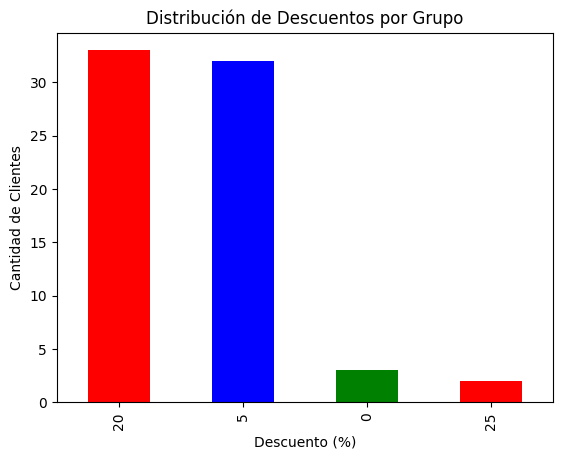

In [22]:
# Distribucion
import matplotlib.pyplot as plt

estrategia['descuento'].value_counts().plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Distribución de Descuentos por Grupo')
plt.xlabel('Descuento (%)')
plt.ylabel('Cantidad de Clientes')
plt.show()

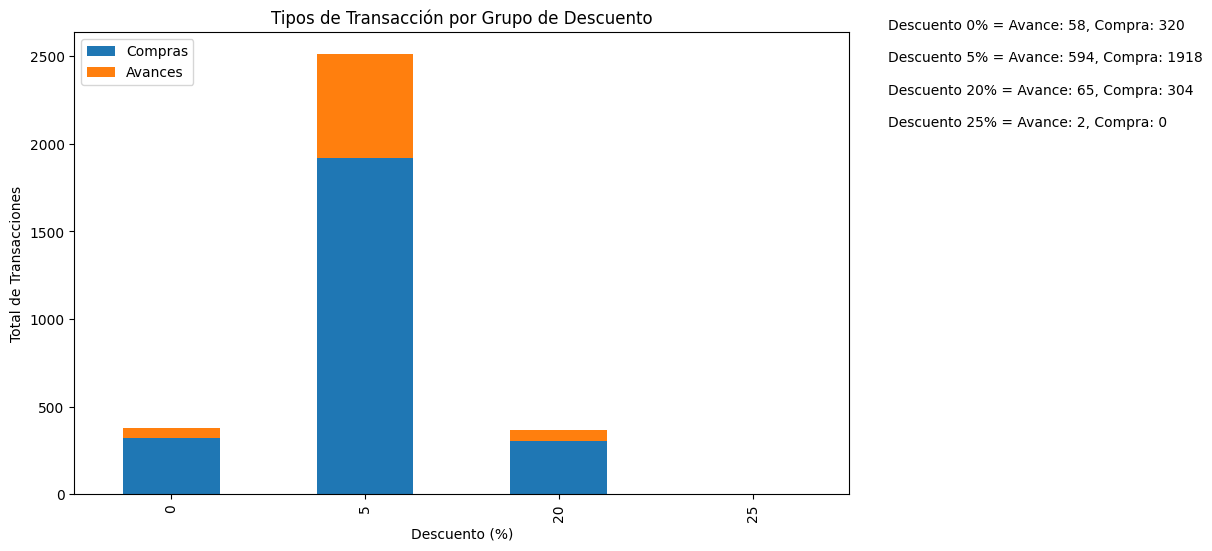

In [23]:
import matplotlib.pyplot as plt

# Agrupar por descuento y sumar las transacciones de compra y avance
transacciones_por_descuento = estrategia.groupby('descuento')[['transacciones_compra', 'transacciones_avance']].sum()

# Crear el gráfico apilado
ax = transacciones_por_descuento.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['#1f77b4', '#ff7f0e']
)

# Agregar la leyenda original
plt.legend(['Compras', 'Avances'], loc='upper left')

# Crear un diccionario con los valores de cada descuento
resumen_textos = {}
for descuento in transacciones_por_descuento.index:
    avance = int(transacciones_por_descuento.loc[descuento, 'transacciones_avance'])  # Convertir a entero
    compra = int(transacciones_por_descuento.loc[descuento, 'transacciones_compra'])  # Convertir a entero
    resumen_textos[descuento] = f'Descuento {descuento}% = Avance: {avance}, Compra: {compra}'

# Posicionar los textos en el gráfico
y_pos = 1  # Posición vertical
for descuento, texto in resumen_textos.items():
    ax.text(1.05, y_pos, texto, ha='left', va='bottom', fontsize=10, color='black', transform=ax.transAxes)
    y_pos -= 0.07  # Espaciado entre las líneas de texto

# Personalizar el gráfico
plt.title('Tipos de Transacción por Grupo de Descuento')
plt.xlabel('Descuento (%)')
plt.ylabel('Total de Transacciones')

plt.show()

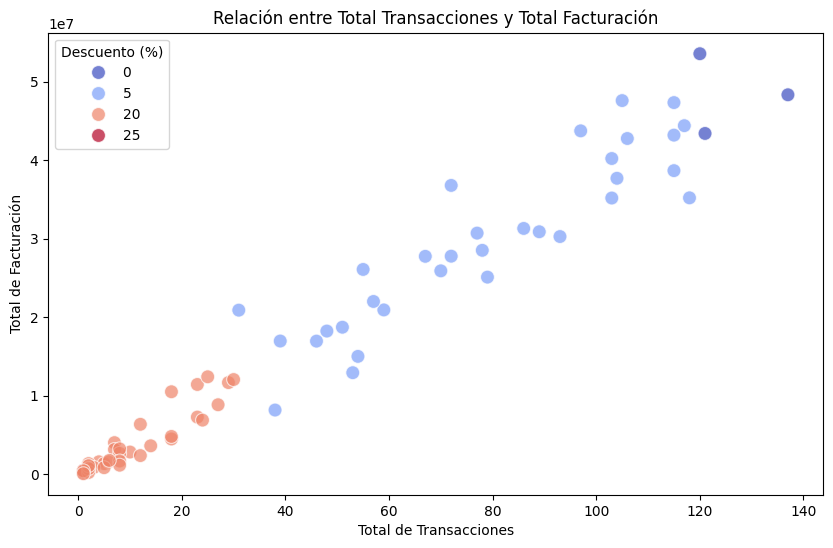

In [25]:
import numpy as np
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=estrategia,
    x='total_transacciones',
    y='total_facturacion',
    hue='descuento',
    palette='coolwarm',
    s=100,
    alpha=0.7
)


plt.title('Relación entre Total Transacciones y Total Facturación')
plt.xlabel('Total de Transacciones')
plt.ylabel('Total de Facturación')
plt.legend(title='Descuento (%)')
plt.show()


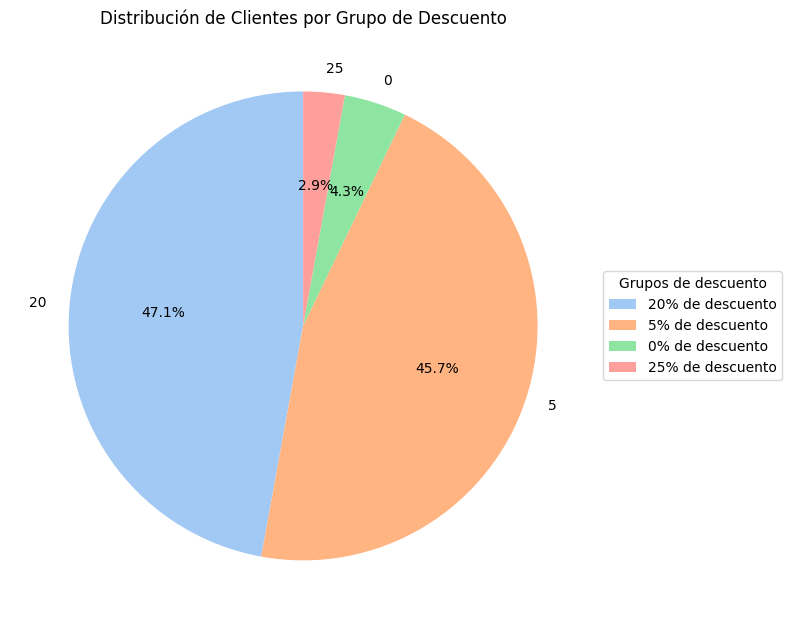

In [ ]:
import seaborn as sns
# Contar el número de clientes por descuento
clientes_por_descuento = estrategia['descuento'].value_counts()

# Crear el gráfico de pie
plt.figure(figsize=(8, 8))
pie_plot = clientes_por_descuento.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')
)
plt.title('Distribución de Clientes por Grupo de Descuento')
plt.ylabel('')  # Remover etiqueta del eje Y

# Agregar leyenda y moverla a la derecha
plt.legend(
    labels=[f'{int(descuento)}% de descuento' for descuento in clientes_por_descuento.index],
    loc='center left',
    bbox_to_anchor=(1.0, 0.5),  # Ajustar posición (x, y)
    title='Grupos de descuento'
)

plt.tight_layout()  # Ajustar el layout para evitar superposiciones
plt.show()